# 피마 인디언 당뇨병

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns ; sns.set();

In [2]:
diabetes = pd.read_csv('./data/diabetes.csv')

In [3]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


* Pregnanices : 임신 횟수
* Glucose : 포도당 부하 검사 수치
* BloodPressure : 혈압
* SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값 
* Insulin : 혈청 인슐린
* BMI : 체질량지수
* DiabetesPedigreeFunction : 당뇨 내력 가중치 값 
* Age : 나이
* Outcome : 클래스 결과 - 당뇨 여부 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler

In [5]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
X = diabetes.iloc[:, :-1] # feature data
y = diabetes.iloc[:, -1]  # label 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156,
                                                   stratify = y) 

`train_test_split()` 에서 `stratify = 레이블 ` 옵션을 주면 계층적 데이터를 추출함 -> 원래 데이터의 분포와 비슷하게 추출   
=> 분류 모델에 유용

In [10]:
lr_clf = LogisticRegression(max_iter=500)
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

In [11]:
import mlGuideFunc

In [12]:
mlGuideFunc.get_clf_eval(y_test, pred)

오차행렬
[[90 10]
 [21 33]]
정확도 : 0.7987 , 정밀도 : 0.7674, 재현율 : 0.6111, F1 : 0.6804, auc : 0.7556


In [15]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]

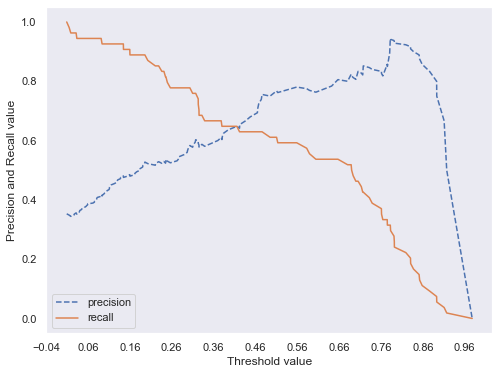

In [16]:
mlGuideFunc.precision_recall_curve_plot(y_test, pred_proba_c1)

In [17]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

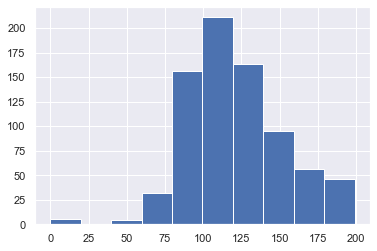

In [18]:
plt.hist(diabetes['Glucose'], bins = 10)

In [19]:
# 0 값을 검사할 feature
zero_features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [20]:
# 전체 데이터 건수 
total_count = diabetes['Glucose'].count()

In [24]:
for feature in zero_features : 
    zero_count = diabetes[diabetes[feature] == 0][feature].count()
    print("{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %".format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


0인 값이 차지하는 비중이 높기 때문에 이를 삭제할 경우 학습이 효과적으로 수행하기 어려울 것으로 판단.   
이상치인 0을 평균값으로 처리

In [25]:
mean_zero_features = diabetes[zero_features].mean()

In [26]:
diabetes[zero_features] = diabetes[zero_features].replace(0, mean_zero_features)

###  데이터 스케일링 

로지스틱 회귀의 경우 일반적으로 숫자 데이터에 스케일링을 적용하는 것이 좋음.  

In [27]:
X = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,-1]

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   random_state = 156, stratify = y )

In [32]:
lr_clf = LogisticRegression(max_iter = 500)

In [33]:
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [34]:
pred = lr_clf.predict(X_test)

In [35]:
mlGuideFunc.get_clf_eval(y_test, pred)

오차행렬
[[90 10]
 [21 33]]
정확도 : 0.7987 , 정밀도 : 0.7674, 재현율 : 0.6111, F1 : 0.6804, auc : 0.7556


In [45]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold = 0.42)

In [46]:
pred_th_42 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

In [47]:
mlGuideFunc.get_clf_eval(y_test, pred_th_42)

오차행렬
[[81 19]
 [20 34]]
정확도 : 0.7468 , 정밀도 : 0.6415, 재현율 : 0.6296, F1 : 0.6355, auc : 0.7198
